## Table of Contents
### 1. Introduction
#### - DataStream API
##### a. About 
##### b. Types of Data Available 
##### c. Limitations
#### - Multiprocessing in Python
### 2. Pre-requisites
### 3. Setup & Load Data
#### - Install DatastreamDSWS pasckage using pip
#### - Define RICs/ISIN and FIelds
### 4. Load Data without multiprocessing
#### - Load Data for Individual RICs
#### - Load data in chunks using `For` Loop for 50 instruments
#### - Load 100 items in chunks using `For` Loop 
#### - Load data for one Instrument and Fifty Fields
#### - Load data for two Instruments and Fifty Fields
### 5. Load Data with multiprocessing using ThreadPool
#### - Load Data for Individual RICs
#### - Load data in chunks using `For` Loop for 50 instruments
#### - Load 100 items in chunks using `For` Loop
#### - Load data for one Instrument and Fifty Fields
#### - Load data for two Instruments and Fifty Fields
### 6. Comparison
### 7. Conclusion
### 8. References

### 1. Introduction
In this Article, we will demonstrate examples of one of the DSWS Python API to load data using parallel processing functionality for reducing the execution time and lead to useful case studies.

#### About DSWS API
Datastream is the world's most comprehensive time-series database, providing strategists, economists, and research communities with the most up-to-date financial data. We can investigate links between data sets, perform correlation analysis, test investment and trading ideas, and research countries, regions, and industries with histories dating back to the 1950s.

There are different types of historical data whcih we can access using this API. Few of them are listed in the below image:

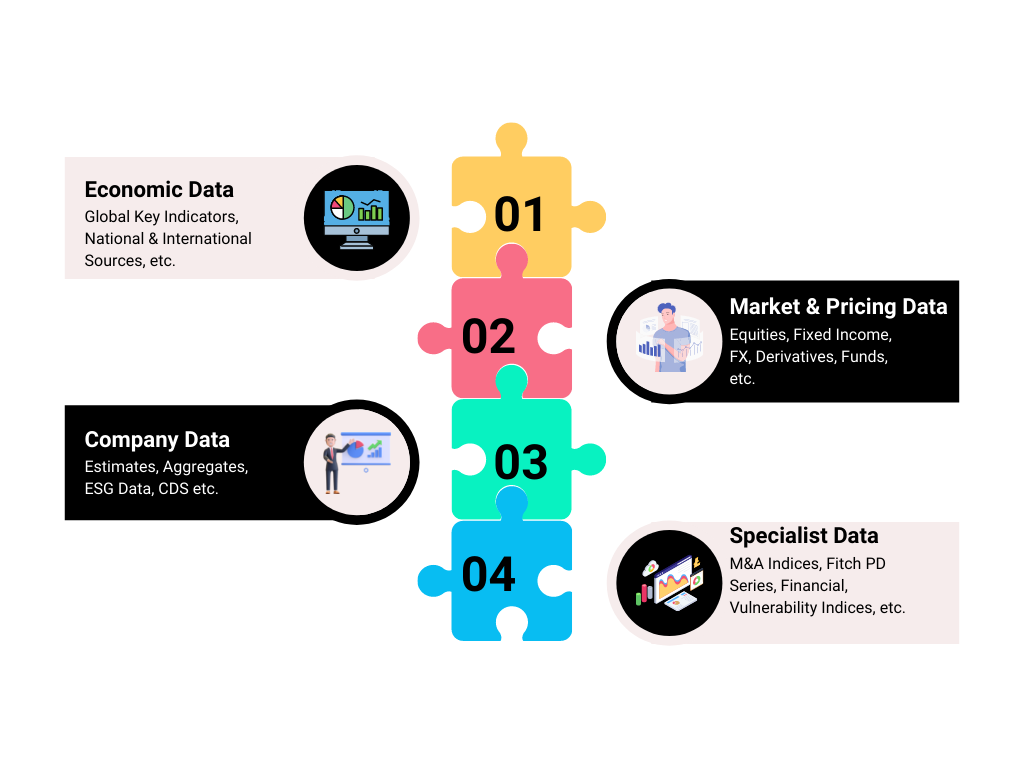

There are certain limitations to number of instruments, datatypes, items (instrument x datatypes)  that can be requested per API call. We can see the details in the below table:

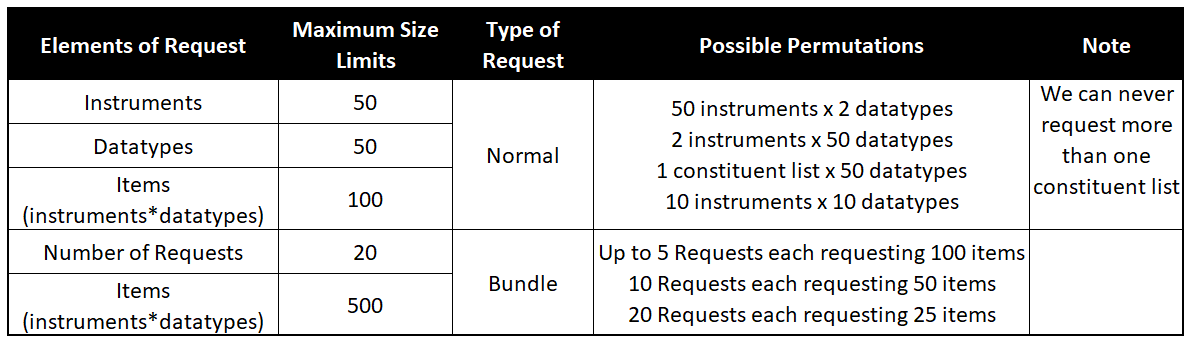

Because of these limitations, if we have to fetch historical data for thousand of RICs, it might be time consuming in certain cases, and to overcome this we are going to make use of multiprocessing functionality available in python for parallel processing of these requests.

But still there will be capped service allowing us to access up to 10 million data points per month only. If we need to access more than 10 million data points per month we will need DSWS Enterprise acess.

#### Multiprocessing in Python

Multiprocessing refers to a system's ability to run many processors simultaneously, each of which can run one or more threads. It is useful for CPU-bound operations, such as computationally intensive tasks, as it benefits from having multiple processors, just like multi-core computers perform quicker than single-core computers.

Also, Please be aware that multiprocessing may result in higher CPU consumption due to the program's use of several CPU cores, which is to be expected. 

In this article we will be using [`ThreadPool`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.ThreadPool). A thread pool object manages a set of worker threads to which jobs can be assigned. ThreadPool instances have the same interface as Pool instances, and their resources must be appropriately managed, either by using the pool as a context manager or manually executing close() and terminate(). It is a collection of threads assigned to perform uniform tasks. The advantage of using a thread pool pattern is defining how many threads are allowed to execute simultaneously. It is to avoid the server crashing due to high CPU load or out-of-memory conditions, e.g., the server's hardware capacity can only support up to 100 requests per second.

### 2. Pre-requisites
To run the example in this article we will need:
1. Datastream DSWS credentials
2. Python 3.6.* or higher 
3. Required Python Packages: DatastreamDSWS & pandas

### 3. Setup & Load Data
Now let's get to real implementation and start with installation of required package

#### - Install DatastreamDSWS package using pip
We can install DatastreamDSWS library using the pip command either from command prompt (in windows) or terminal (in mac/linux) or directly from jupyter notebook as well. 

In [1]:
# !pip install DatastreamDSWS

Let's import the required packages in the current environment which we will be using further

In [2]:
# Import Packages
import DatastreamDSWS as DSWS
import pandas as pd
from multiprocessing.pool import ThreadPool as Pool

Next, we will be initializing DataStream session by calling DSWS.Datastream method and will be using `username` and `password` for user authentication. After successfully initializing the session, we will be using it for requesting data from the API.

In [3]:
ds = DSWS.Datastream(username ="******", password='******')

#### - Define RICs/ISIN and Fields
We will be loading a list of ISIN from a csv file. You may define that list of ISIN directly in the notebook or even load from file of some other sources, eg. excel file, text file, database, etc.

`fields`: the list of valid fields for which we are requesting data from the API

In [6]:
# Loading RICs name from file
stock_list = list(pd.read_excel("Data.xlsx")['Codice_ISIN'])[:3000]
fields = ['(X)~EUR']

In [7]:
len(stock_list)

3000

There will be one other variable`frames`- an empty list in which dataframes will be appended after each request as well which we need to re-define for different cases.

### 4. Load Data without multiprocessing
First, we will load data for few combonations without parallelization

#### Case 1- Load Data for Individual RICs

Loading data for individual ISINs at a time in a for loop. For example, if we have 1000 ISINs, the `for` loop will iterate for 1000 times.

In [6]:
# Declaring Variable
frames = []

In [7]:
%%time
for stock in stock_list:
    df = ds.get_data(stock, fields=['(X)~EUR'], start='-5Y', end='0D', freq='D')
    frames.append(df)

CPU times: total: 3min 12s
Wall time: 1h 24min 40s


In [8]:
len(frames)

3000

#### Case 2- Load data in chunks using `For` Loop for 50 Instruments
Here we will be requesting data in chunks of `50` ISIN which is the maximum limit of number of instruments that can be processed in a single request.

In [9]:
# Declaring Variables
frames = []

In [10]:
%%time
for i in range(0, len(stock_list), 50):
    stock = stock_list[i:i+50]
    df = ds.get_data(",".join(stock), fields=['(X)~EUR'], start='-5Y', end='0D', freq='D')
    frames.append(df)

CPU times: total: 15.6 s
Wall time: 12min 44s


In [11]:
len(frames)

60

#### Case 3- Load data in chunks using `For` Loop for 100 Items
Here we will be requesting data in chunks of `50` ISIN which is the maximum limit of number of instruments and two field values, which will result in 100 items.

In [12]:
# Declaring Variables
frames = []

In [13]:
%%time
for i in range(0, len(stock_list), 50):
    stock = stock_list[i:i+50]
    df = ds.get_data(",".join(stock), fields=['(X)~EUR', 'P'], start='-5Y', end='0D', freq='D')
    frames.append(df)

CPU times: total: 26.1 s
Wall time: 16min 2s


In [14]:
len(frames)

60

#### Case 4- Load data for one Instrument and Fifty Fields
Here we will load data for single instrument at a time with 50 data fields.

In [20]:
# Declaring Variables
frames = []
fields= ['GEOG', 'DSCD', 'LOC', 'CNAME', 'FRP', 'X(DWEV)~U$', 'TR1N', 'TR2N', 'TR3N', 'TR4N', 'DPL#(X(DIBV),5)', 
         'POUT', 'DPL#(X(DY),5)', 'DPL#(X(EPS),5)', 'DPL#(X(DIEP),5)','X(MVC)~U$', 'DPL#(X(P),5)', 'DPL#(X(DWRE),5)', 
         'DPL#(X(DIRE),5)', 'F0NAV', 'F0NDT', 'X(DWEV)~A$', 'X(MVC)~A$', 'DPL#(X(EPS1TR12),5)', 'DPL#(X(ROE1TR12),5)', 
         'DPL#(X(DPS),4)','DPL#(X(DPS1TR12),4)', 'RIC', 'DPL#(X(ROA1TR12),5)', 'DPL#(X(BPS1MN),5)', 
         'DPL#(X(BPS2MN),5)', 'X(IBP)/X(F0BPS)', 'X(IBP)/X(BPS1MN)', 'X(IBP)/X(BPS2MN)', 'F1PER', 'F2PER', 'F0FCF',
         'X(IBP)/X(F0FCF)', 'X(IBP)/X(FCF1MN)', 'X(IBP)/X(FCF2MN)', 'PCH#(X(F0EPS),1Y)', 'NDT1MN', 'NDT2MN', 'R0ROE', 
         'ROE1MN', 'ROE2MN', 'F0ROA', 'ROA1MN', 'FCF1TR12', 'NDT1TR12']

In [21]:
%%time
for stock in stock_list[:100]:
    df = ds.get_data(stock, fields=fields, start='-5Y', end='0D', freq='D')
    frames.append(df)

CPU times: total: 20.2 s
Wall time: 4min 14s


In [22]:
len(frames)

100

#### Case 5- Load data for two Instrument and Fifty Fields
Here we will be loading data for two instruments at a time with 50 data fields.

In [23]:
# Declaring Variables
frames = []
fields= ['GEOG', 'DSCD', 'LOC', 'CNAME', 'FRP', 'X(DWEV)~U$', 'TR1N', 'TR2N', 'TR3N', 'TR4N', 'DPL#(X(DIBV),5)', 
         'POUT', 'DPL#(X(DY),5)', 'DPL#(X(EPS),5)', 'DPL#(X(DIEP),5)','X(MVC)~U$', 'DPL#(X(P),5)', 'DPL#(X(DWRE),5)', 
         'DPL#(X(DIRE),5)', 'F0NAV', 'F0NDT', 'X(DWEV)~A$', 'X(MVC)~A$', 'DPL#(X(EPS1TR12),5)', 'DPL#(X(ROE1TR12),5)', 
         'DPL#(X(DPS),4)','DPL#(X(DPS1TR12),4)', 'RIC', 'DPL#(X(ROA1TR12),5)', 'DPL#(X(BPS1MN),5)', 
         'DPL#(X(BPS2MN),5)', 'X(IBP)/X(F0BPS)', 'X(IBP)/X(BPS1MN)', 'X(IBP)/X(BPS2MN)', 'F1PER', 'F2PER', 'F0FCF',
         'X(IBP)/X(F0FCF)', 'X(IBP)/X(FCF1MN)', 'X(IBP)/X(FCF2MN)', 'PCH#(X(F0EPS),1Y)', 'NDT1MN', 'NDT2MN', 'R0ROE', 
         'ROE1MN', 'ROE2MN', 'F0ROA', 'ROA1MN', 'FCF1TR12', 'NDT1TR12']

In [24]:
%%time
for i in range(0, 100, 2):
    stock = stock_list[i:i+2]
    df = ds.get_data(",".join(stock), fields=fields, start='-5Y', end='0D', freq='D')
    frames.append(df)

CPU times: total: 15 s
Wall time: 2min 23s


In [25]:
len(frames)

50

### 5. Load Data with multiprocessing using `ThreadPool`
Next, we will be using multiprocessing to parallelize and speed-up the data request from API.

#### Case 6- Load Data for Individual RICs using ThreadPool

Loading data for individual ISINs at a time in a for loop. For example, if we have 1000 ISINs, the `for` loop will iterate for 1000 times, but using multiprocessing

In [19]:
# Declaring Variables
frames = []

In [20]:
%%time
pool_size = 20  # your "parallelness"

# define worker function before a Pool is instantiated
def get_data(stock):
    df = ds.get_data(stock, fields=['(X)~EUR'], start='-5Y', end='0D', freq='D')
    frames.append(df)

pool = Pool(pool_size)

for stock in stock_list:
    pool.apply_async(get_data, (stock,))

pool.close()
pool.join()

CPU times: total: 3min 29s
Wall time: 4min 52s


In [21]:
len(frames)

3000

#### Case 7- Load data in chunks using `For` Loop for 50 Instruments
Here we will be requesting data in chunks of `50` ISIN which is the maximum limit of number of instruments that can be processed in a single request, but using multiprocessing

In [22]:
# Declaring Variables
frames = []

In [23]:
%%time
pool_size = 20  # your "parallelness"

# define worker function before a Pool is instantiated
def get_data(stock):
    df = ds.get_data(",".join(stock), fields=['(X)~EUR'], start='-5Y', end='0D', freq='D')
    frames.append(df)

pool = Pool(pool_size)

for i in range(0, len(stock_list), 50):
    stock = stock_list[i:i+50]
    pool.apply_async(get_data, (stock,))

pool.close()
pool.join()

CPU times: total: 25.6 s
Wall time: 34.6 s


In [24]:
len(frames)

60

#### Case 8- Load data in chunks using For Loop for 100 Items
Here we will be requesting data in chunks of 50 ISIN which is the maximum limit of number of instruments and two field values using ThreadPool, which will result in 100 items 

In [25]:
# Declaring Variables
frames = []

In [26]:
%%time
pool_size = 20  # your "parallelness"

# define worker function before a Pool is instantiated
def get_data(stock):
    df = ds.get_data(",".join(stock), fields=['(X)~EUR', 'P'], start='-5Y', end='0D', freq='D')
    frames.append(df)

pool = Pool(pool_size)

for i in range(0, len(stock_list), 50):
    stock = stock_list[i:i+50]
    pool.apply_async(get_data, (stock,))

pool.close()
pool.join()

CPU times: total: 45 s
Wall time: 1min


In [27]:
len(frames)

60

#### Case 9- Load data for one Instrument and Fifty Fields
Here we will load data for single instrument at a time with 50 data fields using multiprocessing

In [26]:
# Declaring Variables
frames = []
fields= ['GEOG', 'DSCD', 'LOC', 'CNAME', 'FRP', 'X(DWEV)~U$', 'TR1N', 'TR2N', 'TR3N', 'TR4N', 'DPL#(X(DIBV),5)', 
         'POUT', 'DPL#(X(DY),5)', 'DPL#(X(EPS),5)', 'DPL#(X(DIEP),5)','X(MVC)~U$', 'DPL#(X(P),5)', 'DPL#(X(DWRE),5)', 
         'DPL#(X(DIRE),5)', 'F0NAV', 'F0NDT', 'X(DWEV)~A$', 'X(MVC)~A$', 'DPL#(X(EPS1TR12),5)', 'DPL#(X(ROE1TR12),5)', 
         'DPL#(X(DPS),4)','DPL#(X(DPS1TR12),4)', 'RIC', 'DPL#(X(ROA1TR12),5)', 'DPL#(X(BPS1MN),5)', 
         'DPL#(X(BPS2MN),5)', 'X(IBP)/X(F0BPS)', 'X(IBP)/X(BPS1MN)', 'X(IBP)/X(BPS2MN)', 'F1PER', 'F2PER', 'F0FCF',
         'X(IBP)/X(F0FCF)', 'X(IBP)/X(FCF1MN)', 'X(IBP)/X(FCF2MN)', 'PCH#(X(F0EPS),1Y)', 'NDT1MN', 'NDT2MN', 'R0ROE', 
         'ROE1MN', 'ROE2MN', 'F0ROA', 'ROA1MN', 'FCF1TR12', 'NDT1TR12']

In [27]:
%%time
pool_size = 20  # your "parallelness"

# define worker function before a Pool is instantiated
def get_data(stock):
    df = ds.get_data(stock, fields=fields, start='-5Y', end='0D', freq='D')
    frames.append(df)

pool = Pool(pool_size)

for stock in stock_list[:100]:
    pool.apply_async(get_data, (stock,))

pool.close()
pool.join()

CPU times: total: 25.9 s
Wall time: 35 s


In [28]:
len(frames)

100

#### Case 10- Load data for two Instrument and Fifty Fields
Here we will be loading data for two instruments at a time with 50 data fields using multiprocessing.

In [29]:
# Declaring Variables
frames = []
fields= ['GEOG', 'DSCD', 'LOC', 'CNAME', 'FRP', 'X(DWEV)~U$', 'TR1N', 'TR2N', 'TR3N', 'TR4N', 'DPL#(X(DIBV),5)', 
         'POUT', 'DPL#(X(DY),5)', 'DPL#(X(EPS),5)', 'DPL#(X(DIEP),5)','X(MVC)~U$', 'DPL#(X(P),5)', 'DPL#(X(DWRE),5)', 
         'DPL#(X(DIRE),5)', 'F0NAV', 'F0NDT', 'X(DWEV)~A$', 'X(MVC)~A$', 'DPL#(X(EPS1TR12),5)', 'DPL#(X(ROE1TR12),5)', 
         'DPL#(X(DPS),4)','DPL#(X(DPS1TR12),4)', 'RIC', 'DPL#(X(ROA1TR12),5)', 'DPL#(X(BPS1MN),5)', 
         'DPL#(X(BPS2MN),5)', 'X(IBP)/X(F0BPS)', 'X(IBP)/X(BPS1MN)', 'X(IBP)/X(BPS2MN)', 'F1PER', 'F2PER', 'F0FCF',
         'X(IBP)/X(F0FCF)', 'X(IBP)/X(FCF1MN)', 'X(IBP)/X(FCF2MN)', 'PCH#(X(F0EPS),1Y)', 'NDT1MN', 'NDT2MN', 'R0ROE', 
         'ROE1MN', 'ROE2MN', 'F0ROA', 'ROA1MN', 'FCF1TR12', 'NDT1TR12']

In [30]:
%%time
pool_size = 20  # your "parallelness"

# define worker function before a Pool is instantiated
def get_data(stock):
    df = ds.get_data(",".join(stock), fields=fields, start='-5Y', end='0D', freq='D')
    frames.append(df)

pool = Pool(pool_size)

for i in range(0, 100, 2):
    stock = stock_list[i:i+2]
    pool.apply_async(get_data, (stock,))

pool.close()
pool.join()

CPU times: total: 18 s
Wall time: 27.3 s


In [31]:
len(frames)

50

### 6. Comparison

Let's do the comparison of the requests processed for different combinations with and without parallezation. Below is the table for reference:

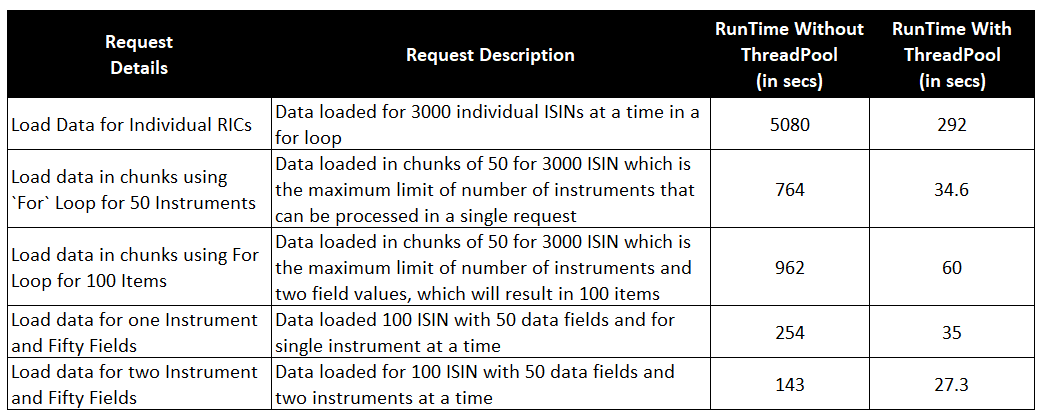

In case 1, we can see that when we loaded data for 3000 ISINs individually, it took around 1hr 24min, and here request is also not optimized, given the API limitation; at a time, in a single request, we can request for 50 ISINs max not exceed 100 items. In contrast, in case 2, we utilized that limitation of 50 ISINs per request for optimizing API calls, resulting in a reduced Execution time to 12 min 44 sec.

In case 4, we requested data for 100 ISINs with 50 fields in 100 iterations, and it took close to 4 mins for execution. We tested the run time here with fewer ISINs and 50 fields, as it would have taken hours to complete code execution for 3000 ISINs. In contrast, in Case 5, we tried making the requests more optimal by properly using limitations, i.e., 100 items per request. It just took 2 min 23 secs to complete the code execution.

In case 6, we did parallelization of requests using ThreadPool instead of a sequential call to API as in case 1, and run time was reduced to 4min 52secs from 1hr 24min, resulting in an exponential reduction in execution time and faster data retrieval.

In case 7, we parallelize the requests we made in case 2. It was observed that the whole request for 3000 ISINs got completed in 34.6secs which took ~12mins for completion without parallelization.

If we compare case 3 and case 8, in both the scenarios, we utilized a limit of the max item, i.e., 100 items (50 ISINs * 2 Fields) per request. However, it took around 16 mins to complete execution in case 3, and in case 8, it just took a min.

In case 9 as well, we requested as of in case 4, but due to parallelization, in this case, the execution time was just 35 secs.

Also, in case 10, it just took 27.3 secs to complete the exact requests as of case 5 due to parallelization.


In all these cases, requests made without parallelization took higher run time. In contrast, the corresponding requests executed using ThreadPool for parallelization took way less time.

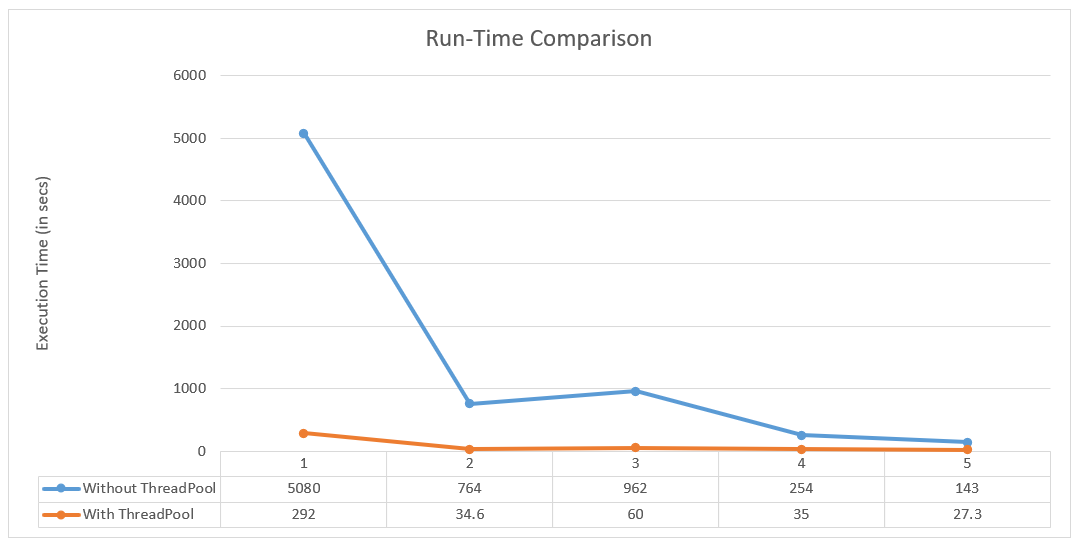

### 7. Conclusion

As we can see from above experiments, using ThreadPool has an added advantage. It is low overhead if the code has a lot of I/O or Network usage, but it's not preferable in all the scenarois. As there is overhead associated with managing threads, so we don't want to use it for basic tasks.

We have seen an exponential speed-up with the above cases. However, we must be careful of generalizing this to more extensive, more complex programs. Data transfer, hardware cache levels, and other issues will certainly reduce this sort of performance gain in "real" codes.

Using proper combination of RICs/ISINs with fields to use the max limit allowed per request will result in shorter run time even without parallelization in few cases. Parallelizing any of the requests using multiprocessing or threading will bring the execution time exponentially down.

### 8. References
- https://developers.refinitiv.com/en/api-catalog/eikon/datastream-web-service
- https://developers.refinitiv.com/en/api-catalog/eikon/datastream-web-service/Documents#getting-started-with-python
- https://developers.refinitiv.com/en/api-catalog/eikon/datastream-web-service/Tutorials#dsws-python-tutorial
- https://developers.refinitiv.com/en/api-catalog/eikon/datastream-web-service/Documents
- https://docs.python.org/3/library/multiprocessing.html